In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
%load_ext autoreload
%autoreload 2
plt.style.use('ggplot')
import sys 
import os
sys.path.append('/'.join(os.getcwd().split('/')[:4]))
from config.get import cfg
from tensorflow import keras
from tensorflow.keras import layers
import autoencoders

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Loaidng data

In [51]:
X_train = np.load(cfg['files']["raw_train_features"])
X_test  = np.load(cfg['files']["raw_test_features"])
print(f"shapes : X_train={X_train.shape},X_test={X_test.shape}")

shapes : X_train=(5355, 3, 600, 2),X_test=(1339, 3, 600, 2)


# Loading model

In [52]:

model_name,autoencoder = autoencoders.fully_connected_3L()
autoencoder.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 3, 600, 2)]       0         
                                                                 
 reshape_14 (Reshape)        (None, 3600)              0         
                                                                 
 dense_32 (Dense)            (None, 600)               2160600   
                                                                 
 dense_33 (Dense)            (None, 100)               60100     
                                                                 
 dense_34 (Dense)            (None, 600)               60600     
                                                                 
 dense_35 (Dense)            (None, 3600)              2163600   
                                                                 
 reshape_15 (Reshape)        (None, 3, 600, 2)         0   

In [ ]:
hist = autoencoder.fit(X_train, X_train,epochs=150)

Epoch 1/150
168/168 [==============================] - 19s 111ms/step - loss: 0.3068
Epoch 2/150
168/168 [==============================] - 18s 108ms/step - loss: 0.1770
Epoch 3/150
168/168 [==============================] - 18s 110ms/step - loss: 0.1512
Epoch 4/150
168/168 [==============================] - 18s 109ms/step - loss: 0.1406
Epoch 5/150
168/168 [==============================] - 18s 108ms/step - loss: 0.1300
Epoch 6/150
168/168 [==============================] - 18s 108ms/step - loss: 0.1263
Epoch 7/150
168/168 [==============================] - 18s 108ms/step - loss: 0.1161
Epoch 8/150
168/168 [==============================] - 18s 107ms/step - loss: 0.1165
Epoch 9/150
168/168 [==============================] - 18s 108ms/step - loss: 0.1125
Epoch 10/150
168/168 [==============================] - 18s 108ms/step - loss: 0.1105
Epoch 11/150
168/168 [==============================] - 18s 109ms/step - loss: 0.1051
Epoch 12/150
168/168 [==============================] - 18s 109

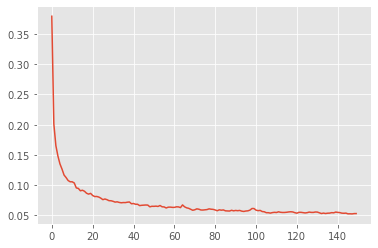

In [48]:
plt.plot(hist.history["loss"])
plt.show()

# Saving 

In [30]:
autoencoder.save(cfg["models"]["autoencoder"] + f"/{model_name}")

In [26]:
model_name

'CNN'

# testing 

In [31]:
def mean_squared_error(x,y):
    return np.sum((x-y)**2)/x.size

train_pred = autoencoder(X_train).numpy()
test_pred  = autoencoder(X_test).numpy()

print(f"MSE train : {mean_squared_error(train_pred,X_train)} \nMSE test  : {mean_squared_error(test_pred,X_test)}")

MSE train : 0.6656895960779817 
MSE test  : 0.672439797862461
